In [2]:
import pandas as pd

df = pd.read_csv("medical_data.csv")

df.head(), df.shape


(   PatientID  Age  Sex        BMI  BloodPressure  Cholesterol    Glucose  \
 0          1   69    0  31.073454     127.772301   211.874017  80.827260   
 1          2   32    1  24.310727     126.715788   214.915163  79.373362   
 2          3   89    0  27.638096     114.707536   145.891556  80.025069   
 3          4   78    1  37.296710     103.971998   203.072026  65.272956   
 4          5   38    0  31.360368     112.151469   157.311825  60.000000   
 
    Smoking  FamilyHistory  PhysicalActivity  Disease  
 0        0              1                 4        0  
 1        1              0                 5        0  
 2        0              0                 5        0  
 3        0              1                 1        0  
 4        0              0                 4        0  ,
 (20000, 11))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["PatientID", "Disease"])
y = df["Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.6115
ROC-AUC: 0.6561360615862986
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      2110
           1       0.58      0.62      0.60      1890

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.61      0.61      0.61      4000



In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.60875
ROC-AUC: 0.6343773665337646
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      2110
           1       0.59      0.54      0.57      1890

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.60      4000
weighted avg       0.61      0.61      0.61      4000



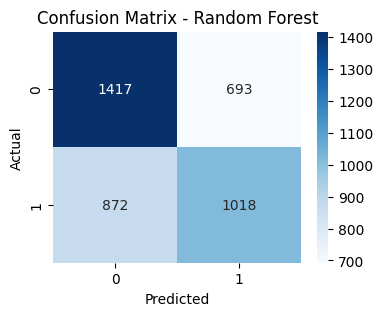

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



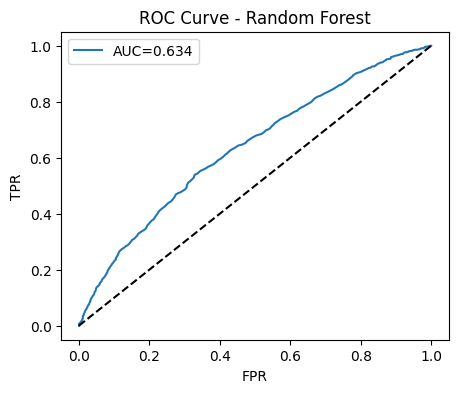

In [7]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob_rf):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


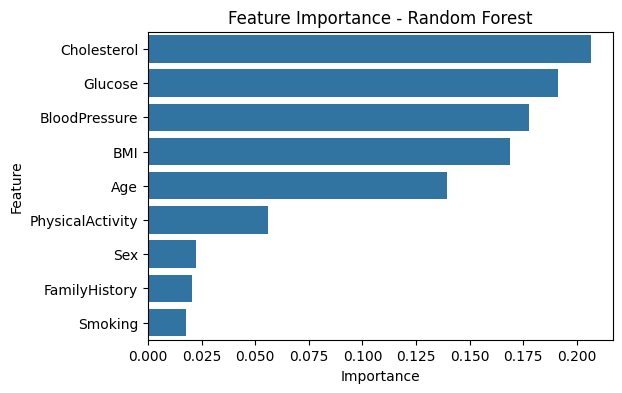

,Feature,Importance
4,Cholesterol,0.206434
5,Glucose,0.191270
3,BloodPressure,0.177750
2,BMI,0.168578
0,Age,0.139251
8,PhysicalActivity,0.056119
1,Sex,0.022223
7,FamilyHistory,0.020528
6,Smoking,0.017849


In [8]:
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Feature Importance - Random Forest")
plt.show()

feat_imp


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# ================================
# 1) Confusion Matrix
# ================================
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=150, bbox_inches='tight')
plt.close()


# ================================
# 2) ROC Curve
# ================================
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob_rf):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve - Random Forest")
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=150, bbox_inches='tight')
plt.close()


# ================================
# 3) Feature Importance
# ================================
plt.figure(figsize=(6,4))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=150, bbox_inches='tight')
plt.close()


# ================================
# 4) Correlation Heatmap (Optional)
# ================================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=150, bbox_inches='tight')
plt.close()

print("All 4 images saved successfully!")


All 4 images saved successfully!
